In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
TH_pulse_dataframe_xenon = pd.read_csv("1024_TH_pulse_dataframe_xenon.csv")

new_rows = []

gases = TH_pulse_dataframe_xenon['gas'].unique()
pressures = TH_pulse_dataframe_xenon['gas pressure'].unique()

for gas in gases:
    for pressure in pressures:
        new_rows.append({
            "gas": gas,
            "gas pressure": pressure,
            "fiber length": 0,
            "pulse energy": 0,
            "pulse duration (FWHM)": 0,
            "pulse peak power": 0,
            "energy conversion efficiency": 0,
            "peak power conversion efficiency": 0
        })

new_rows_df = pd.DataFrame(new_rows)

TH_pulse_dataframe_xenon = pd.concat([new_rows_df, TH_pulse_dataframe_xenon], ignore_index=True, sort=False)

In [4]:
TH_pulse_dataframe_xenon = pd.read_csv("1024_TH_pulse_dataframe_xenon.csv")

new_rows = []

# Get the unique values of gases, pressures, and fiber lengths
gases = TH_pulse_dataframe_xenon['gas'].unique()
pressures = TH_pulse_dataframe_xenon['gas pressure'].unique()
fiber_lengths = TH_pulse_dataframe_xenon['fiber length'].unique()

# Add rows for fiber length = 0
for gas in gases:
    for pressure in pressures:
        new_rows.append({
            "gas": gas,
            "gas pressure": pressure,
            "fiber length": 0,
            "pulse energy": 0,
            "pulse duration (FWHM)": 0,
            "pulse peak power": 0,
            "energy conversion efficiency": 0,
            "peak power conversion efficiency": 0
        })

# Add rows for gas pressure = 0
for gas in gases:
    for fiber_length in fiber_lengths:
        new_rows.append({
            "gas": gas,
            "gas pressure": 0,  # Set pressure to 0
            "fiber length": fiber_length,
            "pulse energy": 0,  # Set signal to 0
            "pulse duration (FWHM)": 0,
            "pulse peak power": 0,
            "energy conversion efficiency": 0,
            "peak power conversion efficiency": 0
        })

# Convert the list of new rows into a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Concatenate the new rows with the original data
TH_pulse_dataframe_xenon = pd.concat([new_rows_df, TH_pulse_dataframe_xenon], ignore_index=True, sort=False)


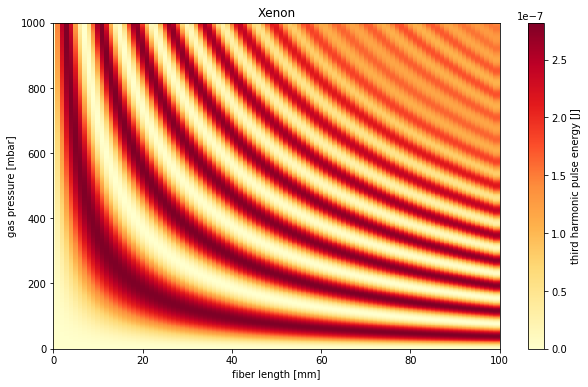

In [5]:
heatmap_TH_energy_xenon = TH_pulse_dataframe_xenon.pivot(index='gas pressure', columns='fiber length', values='pulse energy')

plt.figure(figsize=(10, 6))
plt.imshow(heatmap_TH_energy_xenon, aspect='auto', cmap='YlOrRd', origin='lower')
plt.title('Xenon')
plt.colorbar(label='third harmonic pulse energy [J]')
plt.xlim(0,100)
plt.xlabel('fiber length [mm]')
plt.ylabel('gas pressure [mbar]')
plt.show()

In [6]:
max_TH_energy_index = TH_pulse_dataframe_xenon['energy conversion efficiency'].idxmax()
max_TH_energy = TH_pulse_dataframe_xenon.loc[max_TH_energy_index, 'pulse energy']
TH_conversion_eta = TH_pulse_dataframe_xenon.loc[max_TH_energy_index, 'energy conversion efficiency']
fiber_len = TH_pulse_dataframe_xenon.loc[max_TH_energy_index, 'fiber length']
gas_pressure = TH_pulse_dataframe_xenon.loc[max_TH_energy_index, 'gas pressure']

In [7]:
max_TH_energy

2.820022191714732e-07

In [8]:
TH_conversion_eta*100

0.31290440245975054

In [9]:
fiber_len

11

In [10]:
gas_pressure

0.968

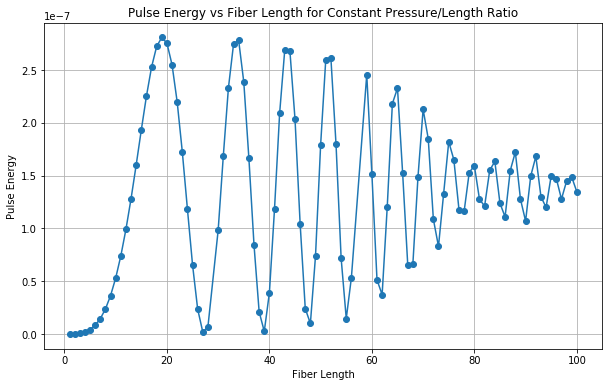

In [11]:
# Define a constant pressure/length ratio
ratio = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

# Extract data along this ratio
diagonal_data = TH_pulse_dataframe_xenon[TH_pulse_dataframe_xenon['gas pressure'] / TH_pulse_dataframe_xenon['fiber length'] == ratio]

# Plot the signal as a function of fiber length
plt.figure(figsize=(10, 6))
plt.plot(diagonal_data['fiber length'], diagonal_data['pulse energy'], marker='o', linestyle='-')
plt.title('Pulse Energy vs Fiber Length for Constant Pressure/Length Ratio')
plt.xlabel('Fiber Length')
plt.ylabel('Pulse Energy')
plt.grid(True)
plt.show()

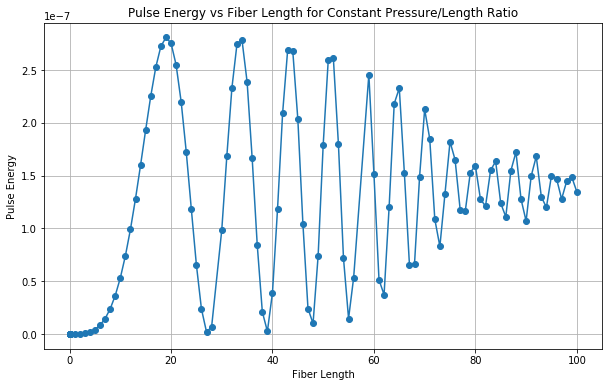

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named TH_pulse_dataframe_xenon

# Define a constant pressure/length ratio
ratio = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()

# Extract data along this ratio
# Explicitly include the case where fiber length is 0
diagonal_data = TH_pulse_dataframe_xenon[
    (TH_pulse_dataframe_xenon['fiber length'] == 0) | 
    (TH_pulse_dataframe_xenon['gas pressure'] / TH_pulse_dataframe_xenon['fiber length'] == ratio)
]

# Plot the signal as a function of fiber length
plt.figure(figsize=(10, 6))
plt.plot(diagonal_data['fiber length'], diagonal_data['pulse energy'], marker='o', linestyle='-')
plt.title('Pulse Energy vs Fiber Length for Constant Pressure/Length Ratio')
plt.xlabel('Fiber Length')
plt.ylabel('Pulse Energy')
plt.grid(True)
plt.show()

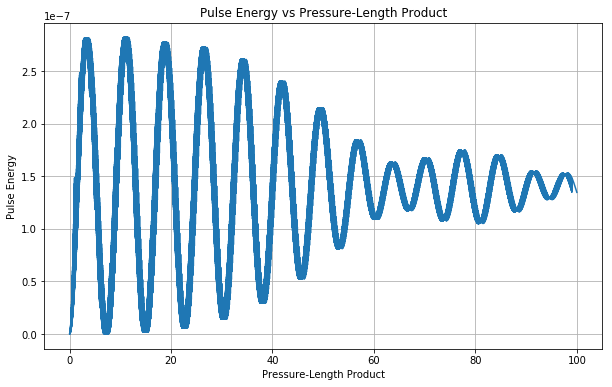

In [13]:
TH_pulse_dataframe_xenon['pressure_length_product'] = TH_pulse_dataframe_xenon['gas pressure'] * TH_pulse_dataframe_xenon['fiber length']

# Sort by the pressure-length product
sorted_data = TH_pulse_dataframe_xenon.sort_values(by='pressure_length_product')

# Plot the signal as a function of pressure-length product
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['pressure_length_product'], sorted_data['pulse energy'], marker=None, linestyle='-')
plt.title('Pulse Energy vs Pressure-Length Product')
plt.xlabel('Pressure-Length Product')
plt.ylabel('Pulse Energy')
plt.grid(True)
plt.show()

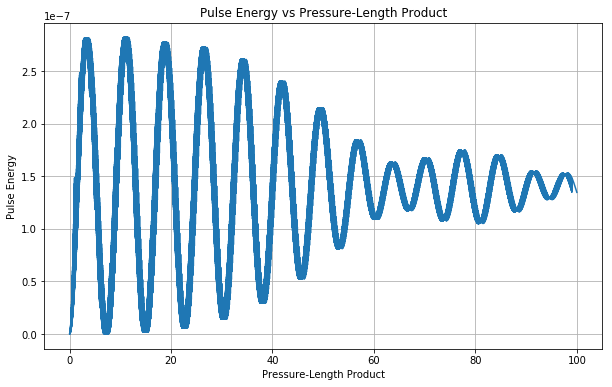

In [14]:
# calculate the pressure-length product
TH_pulse_dataframe_xenon['pressure_length_product'] = TH_pulse_dataframe_xenon['gas pressure'] * TH_pulse_dataframe_xenon['fiber length']

# Sort the data by the pressure-length product
sorted_data = TH_pulse_dataframe_xenon.sort_values(by='pressure_length_product')

# Plot the signal as a function of pressure-length product
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['pressure_length_product'], sorted_data['pulse energy'], marker=None, linestyle='-')
plt.title('Pulse Energy vs Pressure-Length Product')
plt.xlabel('Pressure-Length Product')
plt.ylabel('Pulse Energy')
plt.grid(True)
plt.show()

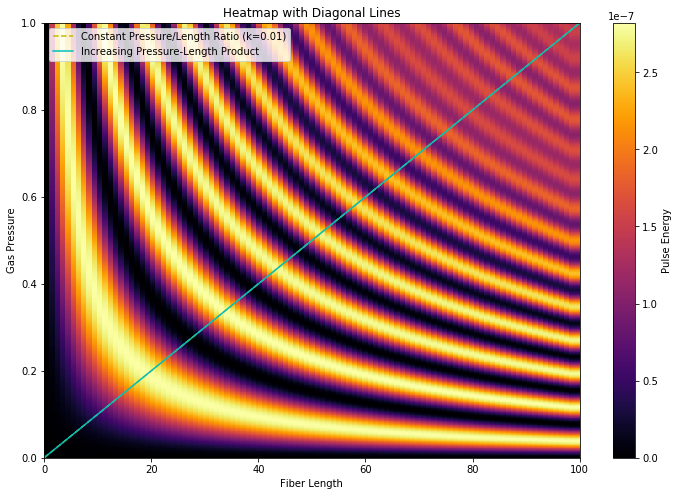

In [15]:
heatmap_TH_energy_xenon = TH_pulse_dataframe_xenon.pivot(index='gas pressure', columns='fiber length', values='pulse energy')

plt.figure(figsize=(12, 8))
plt.imshow(heatmap_TH_energy_xenon, aspect='auto', origin='lower', 
           extent=[TH_pulse_dataframe_xenon['fiber length'].min(), 
                   TH_pulse_dataframe_xenon['fiber length'].max(), 
                   TH_pulse_dataframe_xenon['gas pressure'].min(), 
                   TH_pulse_dataframe_xenon['gas pressure'].max()],
           cmap='inferno')
plt.colorbar(label='Pulse Energy')

# Approach 1: Constant Pressure/Length Ratio
k = TH_pulse_dataframe_xenon['gas pressure'].max() / TH_pulse_dataframe_xenon['fiber length'].max()
fiber_lengths = TH_pulse_dataframe_xenon['fiber length']
pressures = k * fiber_lengths
plt.plot(fiber_lengths, pressures, 'y--', label=f'Constant Pressure/Length Ratio (k={k:.2f})')

# Approach 2: Increasing Pressure-Length Product
product_values = np.linspace(TH_pulse_dataframe_xenon['gas pressure'].min() * TH_pulse_dataframe_xenon['fiber length'].min(), 
                             TH_pulse_dataframe_xenon['gas pressure'].max() * TH_pulse_dataframe_xenon['fiber length'].max(), 100)
fiber_lengths_product = np.sqrt(product_values / k)
pressures_product = np.sqrt(product_values * k)
plt.plot(fiber_lengths_product, pressures_product, 'c-', label='Increasing Pressure-Length Product')  # 'c-' plots a cyan solid line

# Plot settings
plt.title('Heatmap with Diagonal Lines')
plt.xlabel('Fiber Length')
plt.ylabel('Gas Pressure')
plt.legend()
plt.show()

In [16]:
TH_pulse_dataframe_xenon['gas pressure'].min()

0.0

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


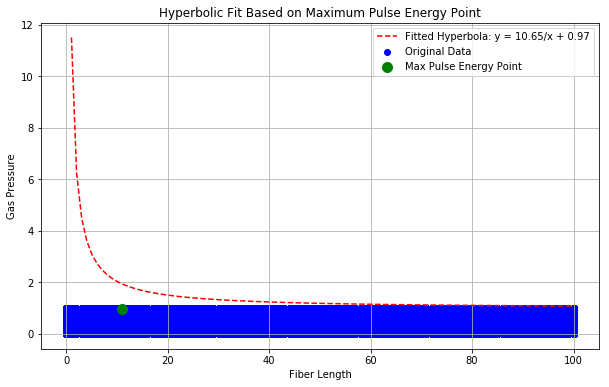

In [22]:
TH_pulse_dataframe_xenon['pressure_length_product'] = TH_pulse_dataframe_xenon['gas pressure'] * TH_pulse_dataframe_xenon['fiber length']

# Identify the row with the maximum pulse energy
max_pulse_energy_row = TH_pulse_dataframe_xenon.loc[TH_pulse_dataframe_xenon['pulse energy'].idxmax()]

# Get the pressure-length product, fiber length, and gas pressure corresponding to the max pulse energy
max_product = max_pulse_energy_row['pressure_length_product']
max_fiber_length = max_pulse_energy_row['fiber length']
max_gas_pressure = max_pulse_energy_row['gas pressure']

# Define the hyperbolic function for fitting
def hyperbola(x, a, b):
    return a / x + b

# Perform the curve fitting based on the maximum pulse energy point
# For this, we fit the hyperbola such that it passes through the maximum pulse energy point
# We use the product as an anchor for the hyperbola
initial_guess = [max_product, max_gas_pressure]

# Use fiber lengths and corresponding gas pressures to fit the hyperbola
fiber_lengths = TH_pulse_dataframe_xenon['fiber length']
pressures = TH_pulse_dataframe_xenon['gas pressure']

# Perform the curve fitting
params, _ = curve_fit(hyperbola, fiber_lengths, pressures, p0=initial_guess)

# Extract the fitted parameters
a_fit, b_fit = params

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(fiber_lengths, pressures, label='Original Data', color='blue')

# Plot the fitted hyperbola
x_fit = np.linspace(fiber_lengths.min(), fiber_lengths.max(), 100)
y_fit = hyperbola(x_fit, a_fit, b_fit)
plt.plot(x_fit, y_fit, 'r--', label=f'Fitted Hyperbola: y = {a_fit:.2f}/x + {b_fit:.2f}')

# Highlight the point of maximum pulse energy
plt.scatter([max_fiber_length], [max_gas_pressure], color='green', marker='o', s=100, label='Max Pulse Energy Point')

# Plot settings
plt.title('Hyperbolic Fit Based on Maximum Pulse Energy Point')
plt.xlabel('Fiber Length')
plt.ylabel('Gas Pressure')
plt.legend()
plt.grid(True)
plt.show()

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


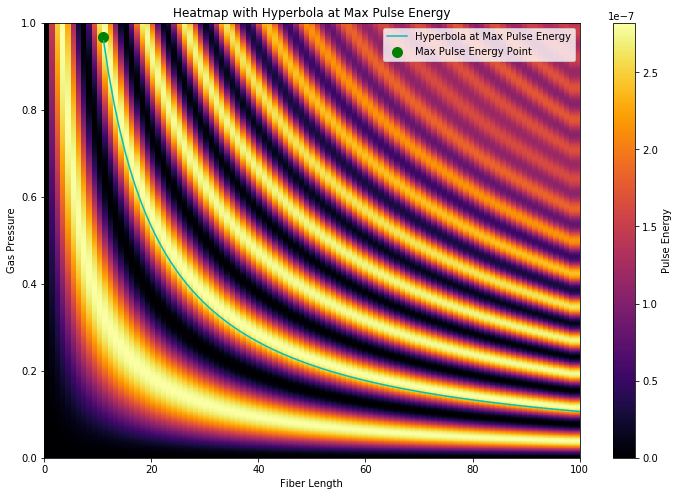

In [23]:
TH_pulse_dataframe_xenon['pressure_length_product'] = TH_pulse_dataframe_xenon['gas pressure'] * TH_pulse_dataframe_xenon['fiber length']

# Identify the row with the maximum pulse energy
max_pulse_energy_row = TH_pulse_dataframe_xenon.loc[TH_pulse_dataframe_xenon['pulse energy'].idxmax()]

# Get the pressure-length product corresponding to the max pulse energy
max_product = max_pulse_energy_row['pressure_length_product']

# Create the heatmap
heatmap_TH_energy_xenon = TH_pulse_dataframe_xenon.pivot(index='gas pressure', columns='fiber length', values='pulse energy')

plt.figure(figsize=(12, 8))
plt.imshow(heatmap_TH_energy_xenon, aspect='auto', origin='lower', 
           extent=[TH_pulse_dataframe_xenon['fiber length'].min(), 
                   TH_pulse_dataframe_xenon['fiber length'].max(), 
                   heatmap_TH_energy_xenon.index.min(), 
                   heatmap_TH_energy_xenon.index.max()],
           cmap='inferno')
plt.colorbar(label='Pulse Energy')

# Plot the hyperbola corresponding to the maximum pulse energy's product
fiber_lengths_hyperbola = np.linspace(TH_pulse_dataframe_xenon['fiber length'].min(), TH_pulse_dataframe_xenon['fiber length'].max(), 100)
pressures_hyperbola = max_product / fiber_lengths_hyperbola

# Ensure the hyperbola is plotted within the valid range of gas pressure
valid_mask_hyperbola = (pressures_hyperbola >= heatmap_TH_energy_xenon.index.min()) & \
                       (pressures_hyperbola <= heatmap_TH_energy_xenon.index.max())
plt.plot(fiber_lengths_hyperbola[valid_mask_hyperbola], pressures_hyperbola[valid_mask_hyperbola], 'c-', label='Hyperbola at Max Pulse Energy')

# Highlight the point of maximum pulse energy
plt.scatter([max_pulse_energy_row['fiber length']], [max_pulse_energy_row['gas pressure']], color='green', marker='o', s=100, label='Max Pulse Energy Point')

# Plot settings
plt.title('Heatmap with Hyperbola at Max Pulse Energy')
plt.xlabel('Fiber Length')
plt.ylabel('Gas Pressure')
plt.legend()
plt.show()


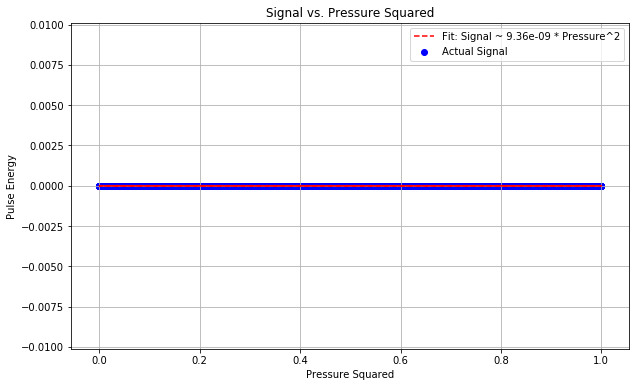

In [24]:
TH_pulse_dataframe_xenon['pressure_squared'] = TH_pulse_dataframe_xenon['gas pressure'] ** 2

# Plot the actual signal (e.g., pulse energy) against the squared pressure
plt.figure(figsize=(10, 6))
plt.scatter(TH_pulse_dataframe_xenon['pressure_squared'], TH_pulse_dataframe_xenon['pulse energy'], label='Actual Signal', color='blue')

# Optionally, fit a curve to show the proportional relationship
# For simplicity, we assume signal = a * pressure^2
fit_coeff = np.polyfit(TH_pulse_dataframe_xenon['pressure_squared'], TH_pulse_dataframe_xenon['pulse energy'], 1)
fit_line = np.polyval(fit_coeff, TH_pulse_dataframe_xenon['pressure_squared'])

# Plot the fitted line to show the expected behavior
plt.plot(TH_pulse_dataframe_xenon['pressure_squared'], fit_line, color='red', linestyle='--', label=f'Fit: Signal ~ {fit_coeff[0]:.2e} * Pressure^2')

# Plot settings
plt.title('Signal vs. Pressure Squared')
plt.xlabel('Pressure Squared')
plt.ylabel('Pulse Energy')
plt.legend()
plt.grid(True)
plt.show()

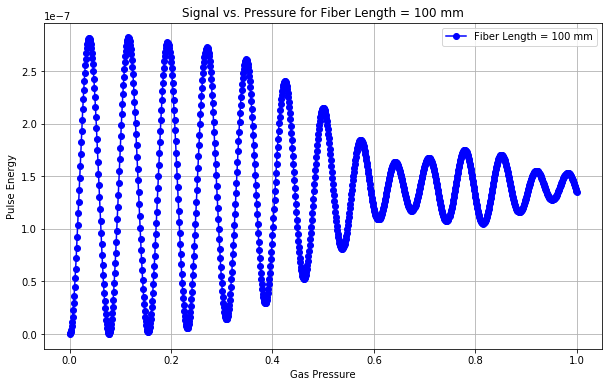

In [27]:
fiber_length_value = 100
filtered_data = TH_pulse_dataframe_xenon[TH_pulse_dataframe_xenon['fiber length'] == fiber_length_value]

# Plot the signal (pulse energy) vs. pressure for the specific fiber length
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['gas pressure'], filtered_data['pulse energy'], marker='o', linestyle='-', color='blue', label=f'Fiber Length = {fiber_length_value} mm')

# Plot settings
plt.title(f'Signal vs. Pressure for Fiber Length = {fiber_length_value} mm')
plt.xlabel('Gas Pressure')
plt.ylabel('Pulse Energy')
plt.legend()
plt.grid(True)
plt.show()

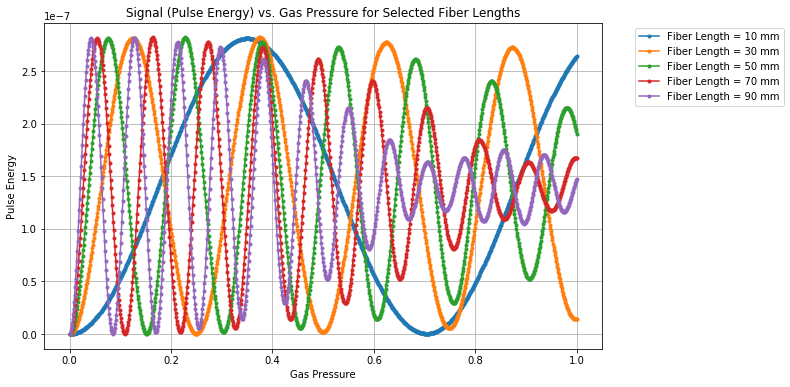

In [31]:
fiber_lengths_to_plot = [10, 30, 50, 70, 90]  # Example fiber lengths

plt.figure(figsize=(10, 6))

# Loop over the selected fiber lengths and plot the corresponding data
for fiber_length in fiber_lengths_to_plot:
    subset = TH_pulse_dataframe_xenon[TH_pulse_dataframe_xenon['fiber length'] == fiber_length]
    plt.plot(subset['gas pressure'], subset['pulse energy'], marker='.', linestyle='-', label=f'Fiber Length = {fiber_length} mm')

# Plot settings
plt.title('Signal (Pulse Energy) vs. Gas Pressure for Selected Fiber Lengths')
plt.xlabel('Gas Pressure')
plt.ylabel('Pulse Energy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)
plt.show()